In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Download necessary NLTK resources 
nltk.download('stopwords')

# Function for removing non-content words and trimming text
def remove_ncw_trim(raw_text, additional_noncontent_words):
    stop_words = set(stopwords.words('english'))
    stop_words.update(additional_noncontent_words)
    raw_text = re.sub(r'[x*]+|[^A-Za-z\s]', '', raw_text)
    filtered_words = [word for word in raw_text.split() if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Importing data
train_data = pd.read_excel("Dataset/training_dataset.xlsx")
val_data = pd.read_excel("Dataset/validation_dataset.xlsx")

# Text cleaning
non_content = ['um', 'uh', 'mhm', 'mm', 'oh', 'customer', 'agent', 'says']
train_data['cleaned_text'] = train_data['text'].apply(lambda x: remove_ncw_trim(x, non_content))
val_data['cleaned_text'] = val_data['text'].apply(lambda x: remove_ncw_trim(x, non_content))

# Initialize TF-IDF Vectorizer and transform the data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['cleaned_text'])
X_validation_tfidf = tfidf_vectorizer.transform(val_data['cleaned_text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Evaluating Logistic Regression String Labels


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `

Accuracy: 0.5824, Precision: 0.5795, Recall: 0.5824, Weighted F1 Score: 0.5722, Micro F1 Score: 0.5824


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

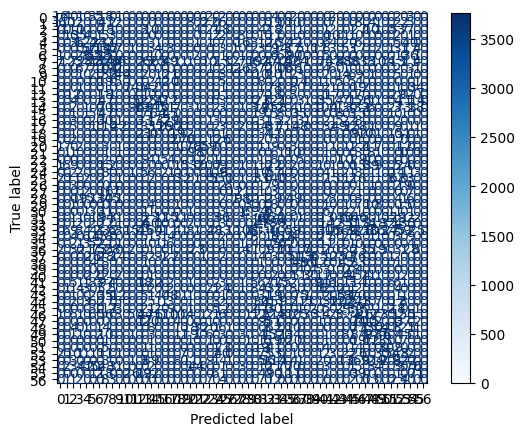

Evaluating Logistic Regression Numeric Labels


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Accuracy: 0.5824, Precision: 0.5795, Recall: 0.5824, Weighted F1 Score: 0.5722, Micro F1 Score: 0.5824


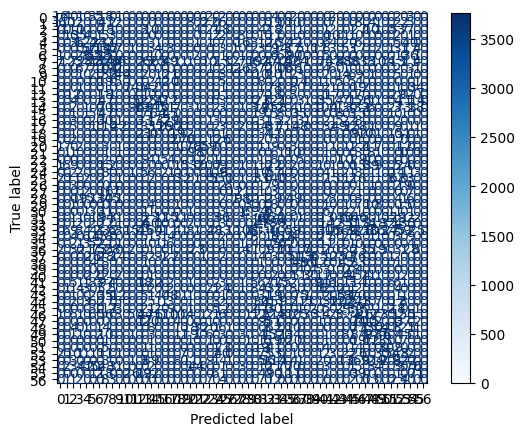

Evaluating SVM


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
# Function to calculate and display metrics
def evaluate_model(model, X_train, y_train, X_val, y_val, label_encoder=None):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    if label_encoder:
        predictions = label_encoder.inverse_transform(predictions)
        y_val = label_encoder.inverse_transform(y_val)
    
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions, average='weighted')
    recall = recall_score(y_val, predictions, average='weighted')
    f1_weighted = f1_score(y_val, predictions, average='weighted')
    f1_micro = f1_score(y_val, predictions, average='micro')

    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Weighted F1 Score: {f1_weighted:.4f}, Micro F1 Score: {f1_micro:.4f}')
    cm = confusion_matrix(y_val, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Label Encoding
le = LabelEncoder()
train_data['numeric_label'] = le.fit_transform(train_data['label'])
val_data['numeric_label'] = le.transform(val_data['label'])

# Initialize classifiers
lr_classifier_string = LogisticRegression()
lr_classifier_numeric = LogisticRegression()
svm_classifier = SVC()
xgboost_classifier = XGBClassifier()

# Models dictionary
models = {
    'Logistic Regression String Labels': lr_classifier_string,
    'Logistic Regression Numeric Labels': lr_classifier_numeric,
    'SVM': svm_classifier,
    'XGBoost': xgboost_classifier
}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}")
    if 'Numeric' in name:
        evaluate_model(model, X_train_tfidf, train_data['numeric_label'], X_validation_tfidf, val_data['numeric_label'], le)
    else:
        evaluate_model(model, X_train_tfidf, train_data['label'], X_validation_tfidf, val_data['label'])